In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ifood_df = pd.read_csv('ifood_df.csv')

In [3]:
# ifood_df.head()

In [4]:
ifood_df.shape

(2205, 39)

In [5]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
# ifood_df.info()

In [7]:
# ifood_df.isna().sum()

In [8]:
# Adding a new column 'education_level' with the name
# Combining too many columns into one column 'Education'

education_level = []
for ind in ifood_df.index:
    if ifood_df['education_2n Cycle'][ind]==1:
        education_level.append('2n Cycle')
    elif ifood_df['education_Basic'][ind]==1:
        education_level.append('Basic')
    elif ifood_df['education_Graduation'][ind]==1:
        education_level.append('Bachelor')
    elif ifood_df['education_Master'][ind]==1:
        education_level.append('Master')
    elif ifood_df['education_PhD'][ind]==1:
        education_level.append('PhD')
    
        
ifood_df['Education']=education_level

In [9]:
# doing the same thing with marital_status

marital_status=[]
for ind in ifood_df.index:
    if ifood_df['marital_Married'][ind]==1:
        marital_status.append('Married')
    elif ifood_df['marital_Single'][ind]==1:
        marital_status.append('Single')
    elif ifood_df['marital_Together'][ind]==1:
        marital_status.append('Together')
    elif ifood_df['marital_Widow'][ind]==1:
        marital_status.append('Widow')
    elif ifood_df['marital_Divorced'][ind]==1:
        marital_status.append('Divorced')
    
        
ifood_df['MR_status']=marital_status

In [10]:
# Let's see what categories the majority of clients belong to

ifood_df[['MR_status','Education']].value_counts().nlargest(10)

MR_status  Education
Married    Bachelor     429
Together   Bachelor     283
Single     Bachelor     248
Married    PhD          187
           Master       138
Divorced   Bachelor     118
Together   PhD          114
           Master       101
Single     PhD           99
Married    2n Cycle      80
dtype: int64

In [11]:
# Checking the number of complaints

ifood_df['Complain'].value_counts()

0    2185
1      20
Name: Complain, dtype: int64

In [12]:
# Mostly older people with bachelor's degrees complain

ifood_df.groupby(['Age','Education'])['Complain'].sum().nlargest(5)

Age  Education
61   Bachelor     3
42   Bachelor     2
66   Bachelor     2
25   2n Cycle     1
32   2n Cycle     1
Name: Complain, dtype: int64

In [13]:
#Checking for duplicates, 362 lines are marked as duplicates, but make sure they are not

ifood_df[ifood_df.duplicated(keep=False)]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MR_status
14,82800.0,0,0,23,1006,22,115,59,68,45,...,0,0,0,0,1,1270,1225,2,PhD,Single
16,37760.0,0,0,20,84,5,38,150,12,28,...,0,0,1,0,0,289,261,0,Bachelor,Together
22,65324.0,0,1,0,384,0,102,21,32,5,...,0,0,0,0,1,539,534,0,PhD,Married
23,40689.0,0,1,69,270,3,27,39,6,99,...,0,0,1,0,0,345,246,0,Bachelor,Together
27,84618.0,0,0,96,684,100,801,21,66,0,...,0,0,0,0,1,1672,1672,1,PhD,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,0,0,1,0,0,14,13,0,Bachelor,Together
2188,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,1,0,1358,1278,2,Master,Single
2192,58554.0,1,1,55,368,24,68,38,0,88,...,0,0,1,0,0,498,410,0,Bachelor,Together
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,1,0,0,21,12,0,Bachelor,Married


In [14]:
# Creating a dataframe for a separate chart of products in the dashboard

products = ifood_df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','MntTotal']].sum()
products['MntTotal']= ifood_df['MntTotal'].sum() + ifood_df['MntGoldProds'].sum()
products

MntWines             675093
MntFruits             58219
MntMeatProducts      364513
MntFishProducts       83253
MntSweetProducts      59818
MntGoldProds          97146
MntTotal            1338042
dtype: int64

In [15]:
# Сalculating for each product the sum and share of purchases

revenue = pd.DataFrame(products)
revenue = revenue.rename(columns={0:'Revenue'})
revenue['% Share of the total revenue'] = ifood_df[['MntWines','MntMeatProducts', 'MntFishProducts','MntFruits', 'MntSweetProducts','MntGoldProds']].sum()/ifood_df['MntTotal'].sum()*100 
revenue['% Share of the total revenue'] = (np.round(revenue['% Share of the total revenue'], 2).astype(str))+'%'
revenue

,Revenue,% Share of the total revenue
MntWines,675093,54.4%
MntFruits,58219,4.69%
MntMeatProducts,364513,29.37%
MntFishProducts,83253,6.71%
MntSweetProducts,59818,4.82%
MntGoldProds,97146,7.83%
MntTotal,1338042,nan%


In [16]:
# Using an index as a key to build relationships with the another table in the Tableau

revenue =revenue.reset_index()
revenue = revenue.rename(columns={'index':'Products'})
revenue = revenue.rename_axis('index_id').reset_index()
revenue

,index_id,Products,Revenue,% Share of the total revenue
0,0,MntWines,675093,54.4%
1,1,MntFruits,58219,4.69%
2,2,MntMeatProducts,364513,29.37%
3,3,MntFishProducts,83253,6.71%
4,4,MntSweetProducts,59818,4.82%
5,5,MntGoldProds,97146,7.83%
6,6,MntTotal,1338042,nan%


In [17]:
# revenue.to_csv('Productss.csv',index=False)

In [18]:
# Counting the number of children and teenagers

ifood_df['Children']=ifood_df['Kidhome']+ifood_df['Teenhome']
ifood_df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2200    1
2201    3
2202    0
2203    1
2204    2
Name: Children, Length: 2205, dtype: int64

In [19]:
# Converting the number of days to years

def handle_customerDays(value):
    return int(value/365)

ifood_df['Customer_Days']=ifood_df['Customer_Days'].apply(handle_customerDays)

# Renaming the column
ifood_df.rename(columns={'Customer_Days':'Customer_Years'},inplace=True)
set(ifood_df['Customer_Years'])

{5, 6, 7}

In [20]:
# Counting the Total_Purchases

purchases_cols=[col for col in ifood_df.columns if 'Purchases' in col]
ifood_df['Total_Purchases']=ifood_df[purchases_cols].sum(axis=1)
ifood_df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Purchases']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,3,8,10,4,25
1,2,1,1,2,6
2,1,8,2,10,21
3,2,2,0,4,8
4,5,5,3,6,19
...,...,...,...,...,...
2200,2,9,3,4,18
2201,7,8,2,5,22
2202,1,2,3,13,19
2203,2,6,5,10,23


In [21]:
# Counting all accepted campaigns by Customer_Years 

accepted = ifood_df.groupby('Customer_Years', sort=False)[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                                           'AcceptedCmp1','AcceptedCmp2','Response']].sum()
accepted

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
Customer_Years,,,,,,
7,71,78,76,59,15,219
6,87,80,83,75,13,109
5,5,6,2,8,2,5


In [22]:
#Dropping the columns which are not useful for next steps of analysis

main_df=ifood_df.drop(['Z_CostContact','Z_Revenue','marital_Divorced','marital_Married','marital_Single',
                'marital_Together','marital_Widow','education_2n Cycle','education_Basic',
                'education_Graduation','education_Master','education_PhD','Kidhome','Teenhome'],axis=1)

main_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Years,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MR_status,Children,Total_Purchases
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,7,1529,1441,0,Bachelor,Single,0,25
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,6,21,15,0,Bachelor,Single,2,6
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,6,734,692,0,Bachelor,Together,0,21
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,6,48,43,0,Bachelor,Together,1,8
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,6,407,392,0,PhD,Married,1,19


In [23]:
main_df['Revenue']= ifood_df['MntTotal'].sum() + ifood_df['MntGoldProds'].sum()
main_df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,Customer_Years,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MR_status,Children,Total_Purchases,Revenue
0,58138.0,58,635,88,546,172,88,88,3,8,...,63,7,1529,1441,0,Bachelor,Single,0,25,1338042
1,46344.0,38,11,1,6,2,1,6,2,1,...,66,6,21,15,0,Bachelor,Single,2,6,1338042
2,71613.0,26,426,49,127,111,21,42,1,8,...,55,6,734,692,0,Bachelor,Together,0,21,1338042
3,26646.0,26,11,4,20,10,3,5,2,2,...,36,6,48,43,0,Bachelor,Together,1,8,1338042
4,58293.0,94,173,43,118,46,27,15,5,5,...,39,6,407,392,0,PhD,Married,1,19,1338042


In [24]:
main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,5.162209e+04,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Recency,2205.0,4.900907e+01,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,3.061646e+02,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,2.640317e+01,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,1.653120e+02,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,3.775646e+01,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,2.712834e+01,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,4.405714e+01,51.736211,0.0,9.0,25.0,56.0,321.0
NumDealsPurchases,2205.0,2.318367e+00,1.886107,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2205.0,4.100680e+00,2.737424,0.0,2.0,4.0,6.0,27.0


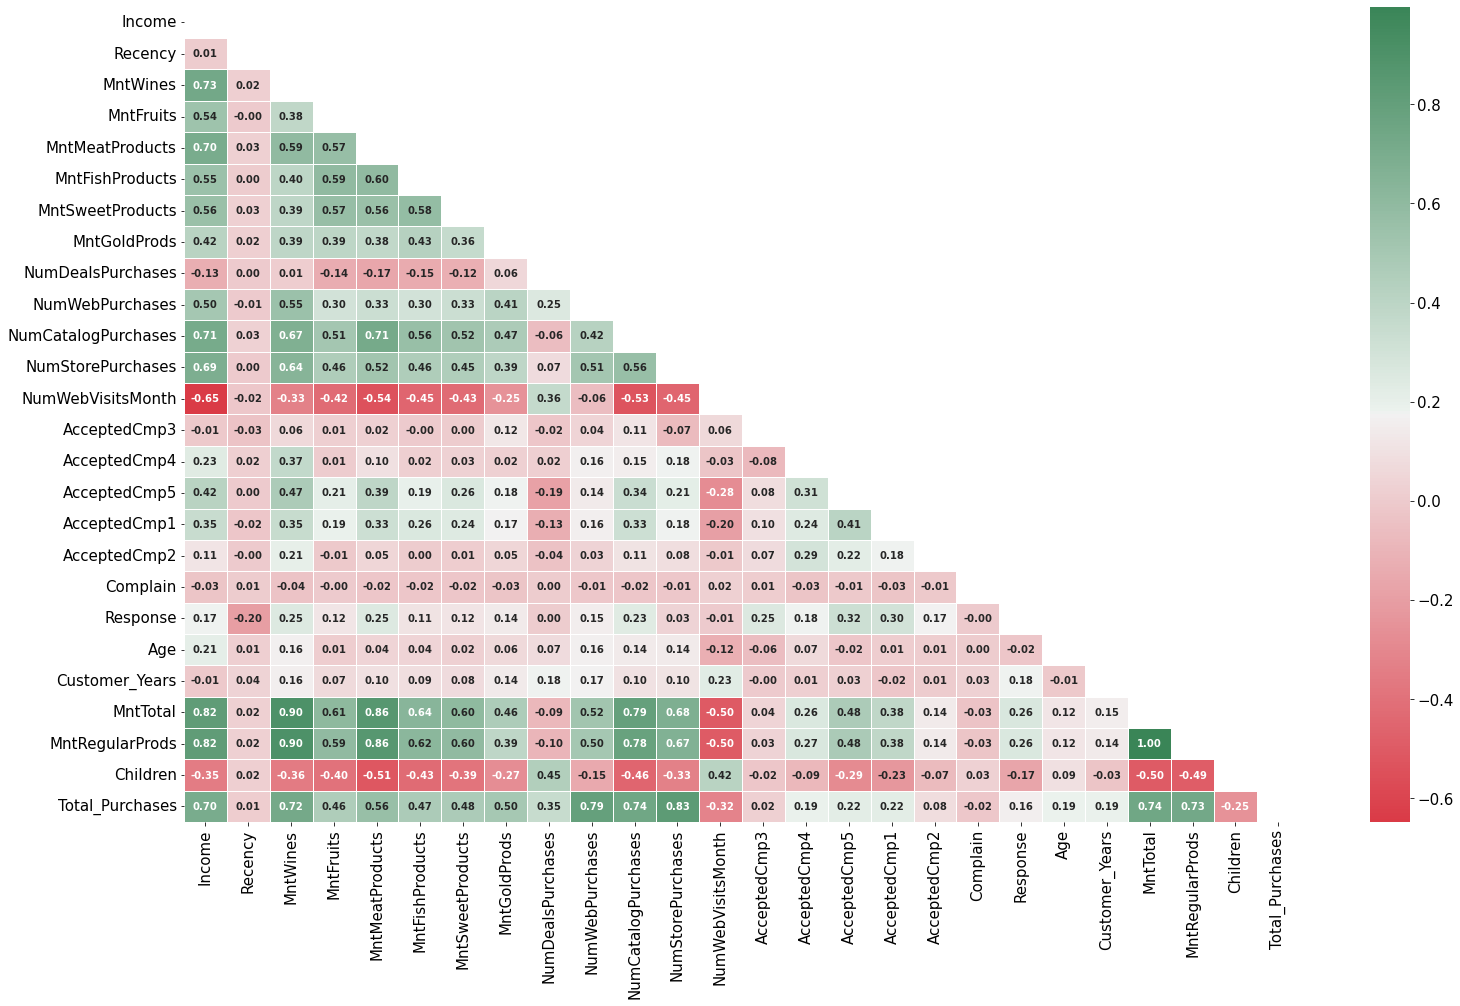

In [25]:
# From this heatmap we can observe the correlated features between which there is a different level of relationshi:
# Positive correlation between customer income and purchases of all types of products. The highest correlation is with wine and meat.
# Strong correlation between NumCatalogPurchases, customer income and Total_Purchases.
# Negative correlation between income and number of visits per month. People with lower incomes are more likely to visit the site regularly.
# Negative correlation between Children and Total_Purchases.
# Positive correlation between Children, NumDealsPurchases(discount products) and NumWebPurchases. 
# Negative correlation between the Recency (last visit to the site) and the number of purchases.


main_df_corr=main_df.drop(['MR_status','Education','AcceptedCmpOverall','Revenue'],axis=1)

plt.figure(figsize=(25, 15))
with plt.style.context({'axes.labelsize':25,
                        'xtick.labelsize':15,
                        'ytick.labelsize':15}):
    mask = np.zeros_like(main_df_corr.corr())
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(10,500, as_cmap=True)
    sns.heatmap(main_df_corr.corr(),linewidths=1,mask=mask,cmap=cmap,annot=True,fmt='.2f',
            annot_kws={
                'fontsize': 10,
                'fontweight': 'bold'
            })


In [26]:
# Using an index as a key to build relationships with the another table in the Tableau

main_df = main_df.rename_axis('index_id').reset_index()
main_df

,index_id,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Age,Customer_Years,MntTotal,MntRegularProds,AcceptedCmpOverall,Education,MR_status,Children,Total_Purchases,Revenue
0,0,58138.0,58,635,88,546,172,88,88,3,...,63,7,1529,1441,0,Bachelor,Single,0,25,1338042
1,1,46344.0,38,11,1,6,2,1,6,2,...,66,6,21,15,0,Bachelor,Single,2,6,1338042
2,2,71613.0,26,426,49,127,111,21,42,1,...,55,6,734,692,0,Bachelor,Together,0,21,1338042
3,3,26646.0,26,11,4,20,10,3,5,2,...,36,6,48,43,0,Bachelor,Together,1,8,1338042
4,4,58293.0,94,173,43,118,46,27,15,5,...,39,6,407,392,0,PhD,Married,1,19,1338042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,46,709,43,182,42,118,247,2,...,53,6,1094,847,0,Bachelor,Married,1,18,1338042
2201,2201,64014.0,56,406,0,30,0,0,8,7,...,74,5,436,428,1,PhD,Together,3,22,1338042
2202,2202,56981.0,91,908,48,217,32,12,24,1,...,39,6,1217,1193,1,Bachelor,Divorced,0,19,1338042
2203,2203,69245.0,8,428,30,214,80,30,61,2,...,64,6,782,721,0,Master,Together,1,23,1338042


In [27]:
# main_df.to_csv('EDA_Tableau.csv',index=False)

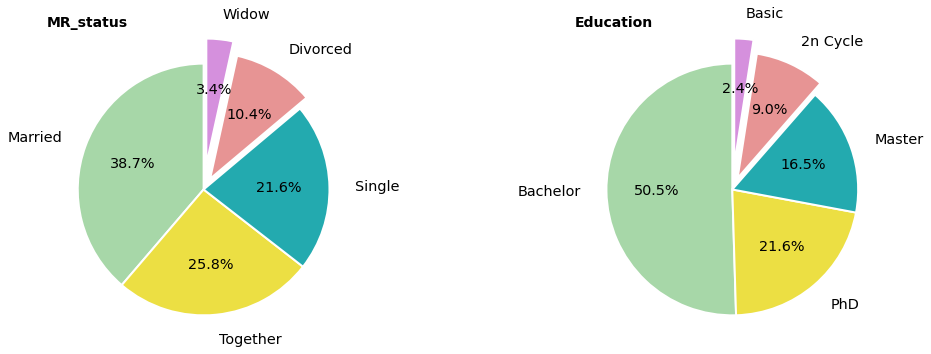

In [28]:
fig,ax = plt.subplots(1,2,figsize=(15,5), sharey=False)

mycolors = ["#A7D7A8", "#ECDF43", "#23AAAF", "#E79494","#D590DD"]

main_df['MR_status'].value_counts().plot(kind='pie',ax=ax[0],autopct='%.1f%%',colors = mycolors, 
                                         startangle=90, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                                         textprops={'size': 'x-large'},explode=(0,0,0,0.1,0.2),labeldistance=1.2)


main_df['Education'].value_counts().plot(kind='pie',ax=ax[1],autopct='%.1f%%',colors = mycolors,
                                         startangle=90, wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
                                         textprops={'size': 'x-large'},explode=(0,0,0,0.1,0.2),labeldistance=1.2)



ax[0].set_title('MR_status',fontweight ='bold', loc = 'left', fontsize=14);
ax[1].set_title('Education',fontweight ='bold', loc = 'left', fontsize=14);
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
plt.tight_layout()
plt.show()

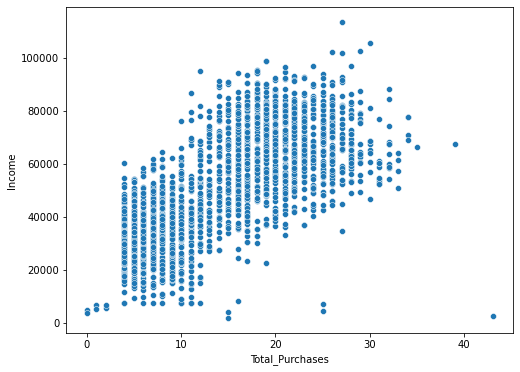

In [29]:
ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x='Total_Purchases', y='Income',
            data=main_df)

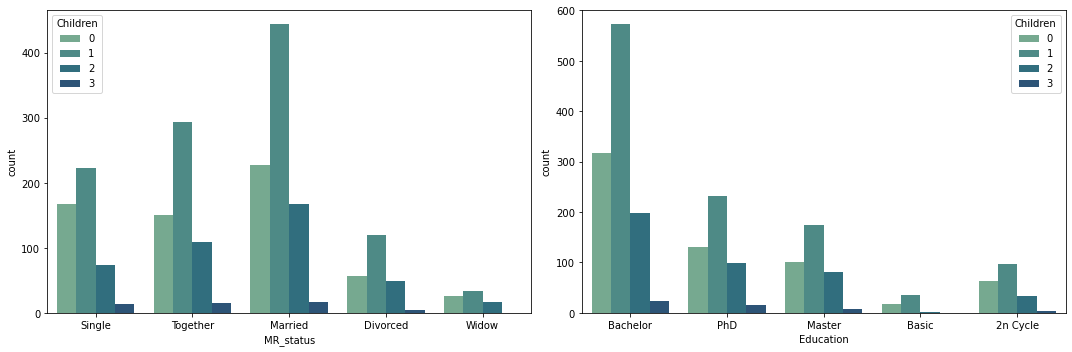

In [30]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=main_df,x='MR_status',hue='Children',ax=ax[0], palette = 'crest')
sns.countplot(data=main_df,x='Education',hue='Children',ax=ax[1], palette = 'crest')

plt.tight_layout()

Text(0.5, 1.0, 'Marketing campaign success rate')

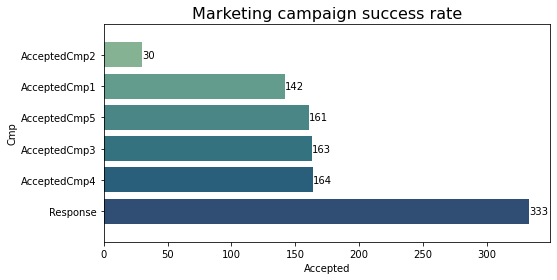

In [31]:
cmp_success=pd.DataFrame(ifood_df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(),
                         columns=['Sum']).reset_index()

ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(x='Sum', y='index', data=cmp_success.sort_values('Sum'),palette="crest") 

for container in ax.containers:
    ax.bar_label(container)

ax.margins(y=0.1)
plt.xlabel('Accepted');
plt.ylabel('Cmp');
plt.title('Marketing campaign success rate',size=16)

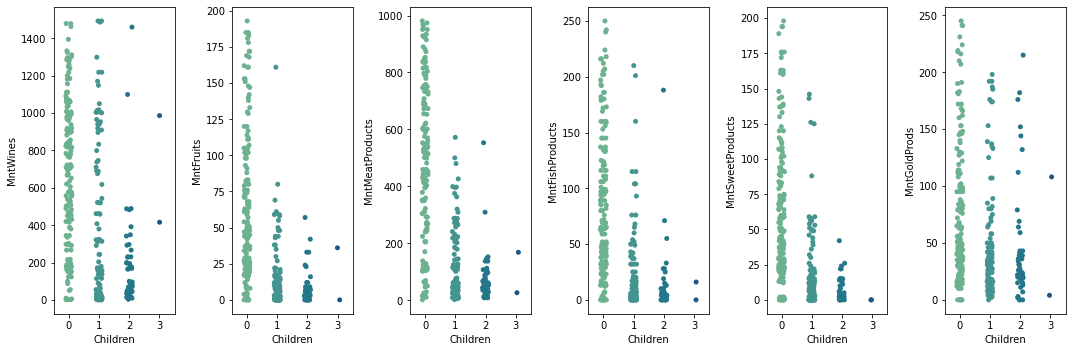

In [32]:
fig,ax = plt.subplots(1,6,figsize=(15,5))

sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntWines"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[0], palette = "crest")
sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntFruits"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[1], palette = "crest")
sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntMeatProducts"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[2], palette = "crest")
sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntFishProducts"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[3], palette = "crest")
sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntSweetProducts"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[4], palette = "crest")
sns.stripplot(y=ifood_df[ifood_df["Response"]==1]["MntGoldProds"], x=ifood_df[ifood_df["Response"]==1]["Children"],ax=ax[5], palette = "crest")

plt.tight_layout()
plt.show()